In [2]:
import pandas as pd 
import quandl as q 

In [3]:
pip install quandl


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import quandl as q

In [5]:
# send request to get query 
q.ApiConfig.api_key = 'yGFwXVn59VRRj3tzczyx'
#msft_data = q.get("EOD/MSFT", start_date="2010-01-01", end_date="2019-01-01")
#msft_data.head()
data = q.get_table('WIKI/PRICES', ticker = ['MSFT'], date = { 'gte': '2010-01-01', 'lte': '2019-01-01' }, paginate=True)
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,MSFT,2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0
1,MSFT,2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2,MSFT,2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
3,MSFT,2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
4,MSFT,2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0


In [6]:
data.describe()

,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
count,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.0,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03
mean,42.862722,43.218251,42.502944,42.879908,4.252287e+07,0.004119,1.0,39.748998,40.077317,39.417026,39.765121,4.252287e+07
std,17.405500,17.524218,17.278283,17.405875,2.400108e+07,0.034688,0.0,18.706579,18.837182,18.567043,18.707100,2.400108e+07
min,23.090000,23.320000,22.730000,23.010000,7.425503e+06,0.000000,1.0,18.937293,19.125928,18.642039,18.871681,7.425503e+06
25%,28.325000,28.575000,28.060000,28.340000,2.627534e+07,0.000000,1.0,24.116187,24.274529,23.833306,24.058958,2.627534e+07
50%,37.870000,38.135000,37.540000,37.860000,3.713556e+07,0.000000,1.0,34.230102,34.552500,34.010999,34.290807,3.713556e+07
75%,52.620000,53.085000,52.125000,52.715000,5.250545e+07,0.000000,1.0,50.343515,50.877178,49.989786,50.434308,5.250545e+07
max,97.000000,97.240000,96.040000,96.770000,3.193179e+08,0.420000,1.0,97.000000,97.240000,96.040000,96.770000,3.193179e+08


In [7]:
import numpy as np 
dailyClose = data['adj_close']
dailyReturn = dailyClose.pct_change()
dailyReturn.fillna(0, inplace=True)
print(dailyReturn)
#calculate monthly return 
data['date'] = pd.to_datetime(data['date'])
mdata = data.resample('M', on='date').sum()
monthReturn = mdata.pct_change()

None
0       0.000000
1       0.048173
2      -0.070377
3       0.029938
4       0.029959
          ...   
2066    0.012884
2067   -0.006784
2068    0.010443
2069    0.006175
2070   -0.000323
Name: adj_close, Length: 2071, dtype: float64


In [8]:
adjPrice = data['adj_close']
# moving average 
mav = adjPrice.rolling(window=50).mean()
print(mav[-10:])

None
2061    23.633664
2062    23.653727
2063    23.662732
2064    23.661470
2065    23.669338
2066    23.679789
2067    23.691432
2068    23.708406
2069    23.728143
2070    23.747390
Name: adj_close, dtype: float64


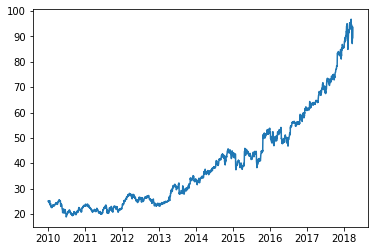

In [9]:
import matplotlib.pyplot as plt 
plt.plot(data['date'],adjPrice)

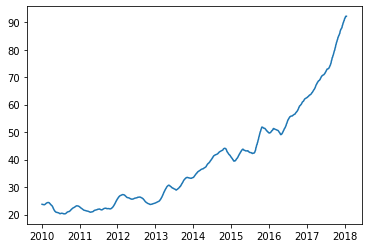

In [10]:
plt.plot(data['date'],mav)

In [11]:
# Simple moving average crossover 
# Momentum based strategy 

# step 1: initialize the short and long lookback periods 
short = 50 
long = 120 
# new dataframe with signal coloumn 
signal = pd.DataFrame(index = data.index)
signal['signal'] = 0.0 
# new short simple moving average 
signal['shortMav'] = data['adj_close'].rolling(window=short,min_periods=1, center=False).mean()
signal['longMav'] = data['adj_close'].rolling(window=long,min_periods=1,center=False).mean()
signal['signal'][short:] = np.where(signal['shortMav'][short:]>signal['longMav'][short:],1.0,0)
# create the trading orders based on the positions column

signal['positions'] = signal['signal'].diff()
signal[signal['positions']==-1]


,signal,shortMav,longMav,positions
None,,,,
57,0.0,91.587200,91.597931,-1.0
550,0.0,49.987769,50.010326,-1.0
616,0.0,50.494353,50.495811,-1.0
753,0.0,42.465621,42.533857,-1.0
895,0.0,42.571232,42.609988,-1.0
1249,0.0,29.387627,29.417793,-1.0
1461,0.0,25.711929,25.723518,-1.0
1560,0.0,26.254428,26.292192,-1.0
1866,0.0,22.229013,22.270259,-1.0


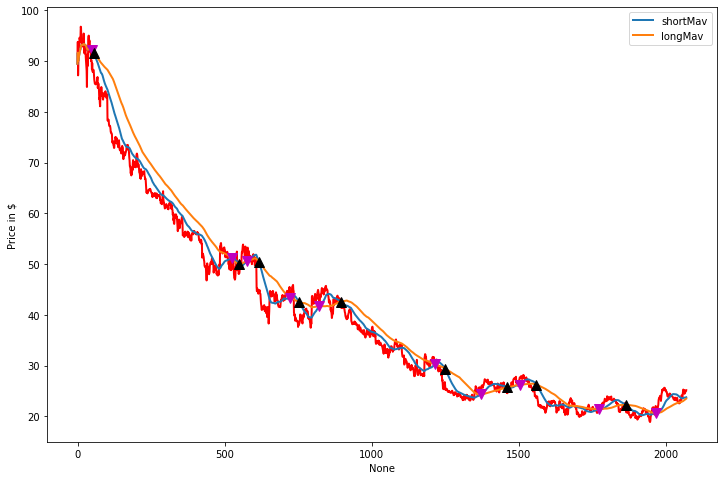

In [12]:
#plotting data 
fig = plt.figure()

plt1 = fig.add_subplot(111,ylabel='Price in $')
data['adj_close'].plot(ax=plt1, lw = 2., figsize=(12,8), color = 'r')
signal[['shortMav','longMav']].plot(ax=plt1,lw = 2., figsize=(12,8))
plt1.plot(signal.loc[signal.positions == 1.0].index, signal.shortMav[signal.positions==1.0],'v',markersize=10,color='m')
plt1.plot(signal.loc[signal.positions == -1.0].index, signal.shortMav[signal.positions==-1.0],'^',markersize=10,color='k')
plt.show()